<a href="https://colab.research.google.com/github/hoonzi-s/hongong_MLDL/blob/main/05-1.%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [73]:
# class 0(레드), 1(화이트)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [75]:
wine.describe()   # 열에 대한 간략한 통계를 출력해 준다. 최소, 최대, 평균 등

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [76]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [81]:
from sklearn.model_selection import train_test_split as tts

train_input, test_input, train_target, test_target = tts(data, target, random_state = 42, test_size = 0.2)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [84]:
print(f'coef. {lr.coef_}\nintercept. {lr.intercept_}')

coef. [[ 0.51270274  1.6733911  -0.68767781]]
intercept. [1.81777902]


# 결정 트리

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


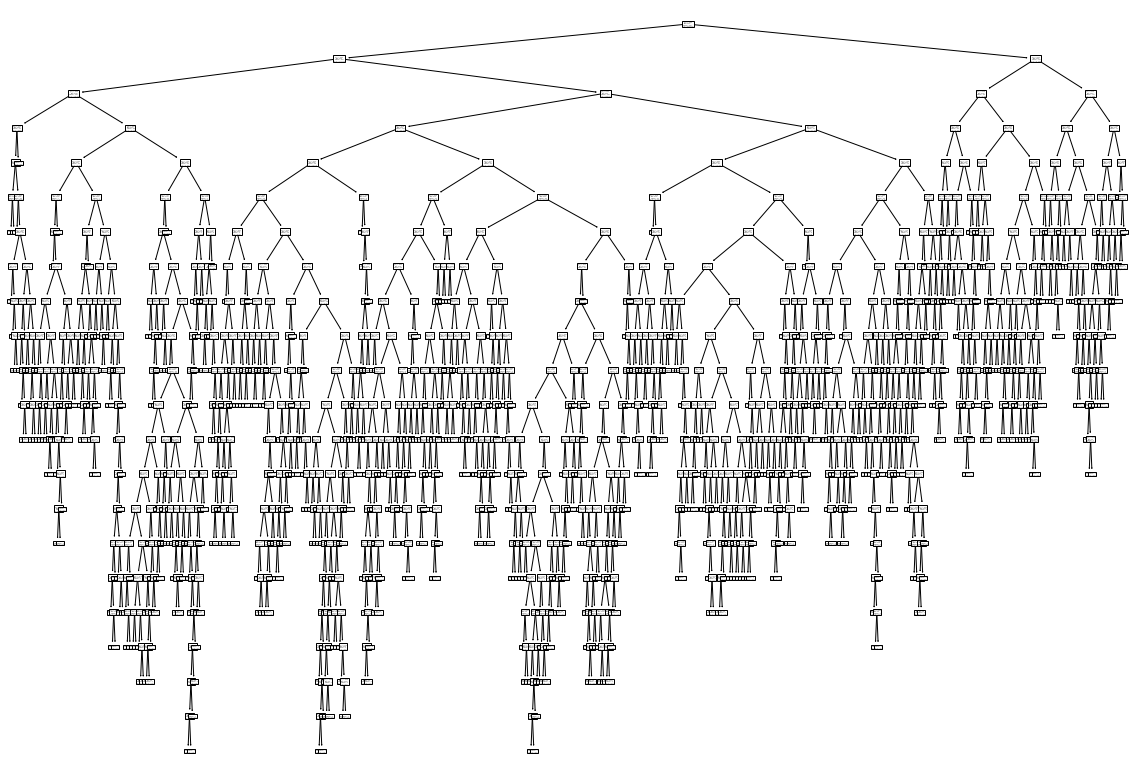

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize= (20, 14))
plot_tree(dt)
plt.show()

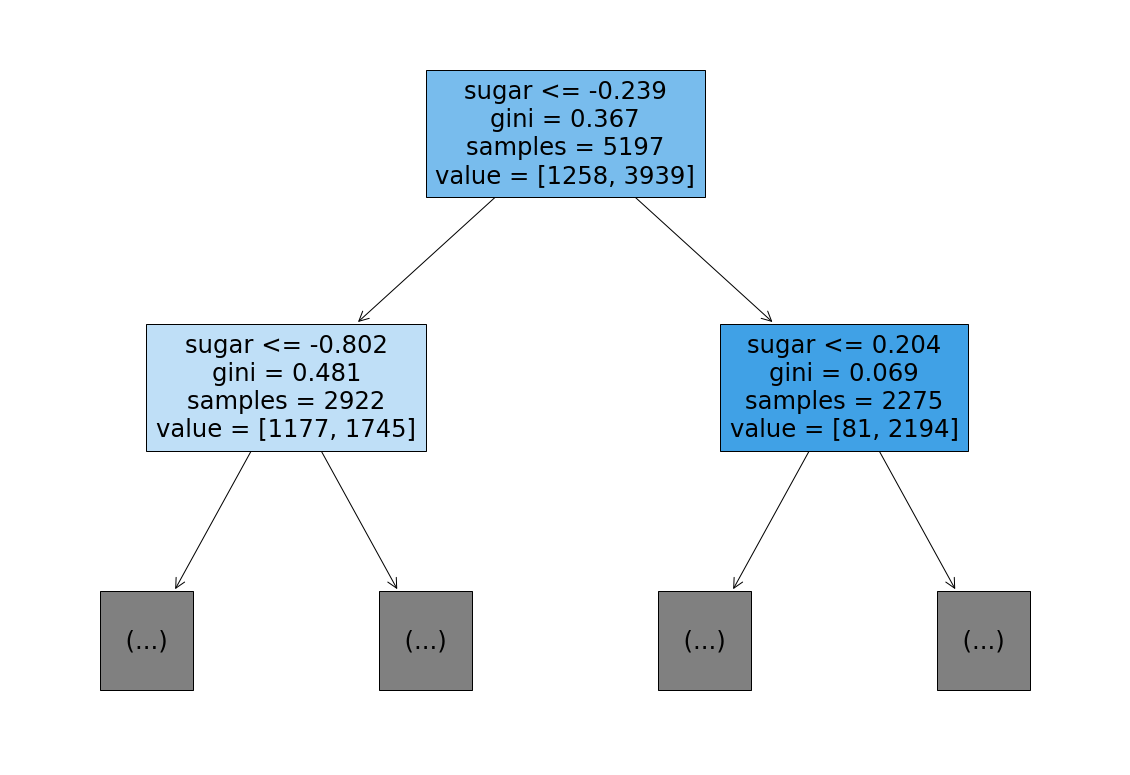

In [101]:
plt.figure(figsize = (20, 14))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [102]:
# 가지치기 (트리의 최대 깊이 지정)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.8454877814123533
0.8415384615384616


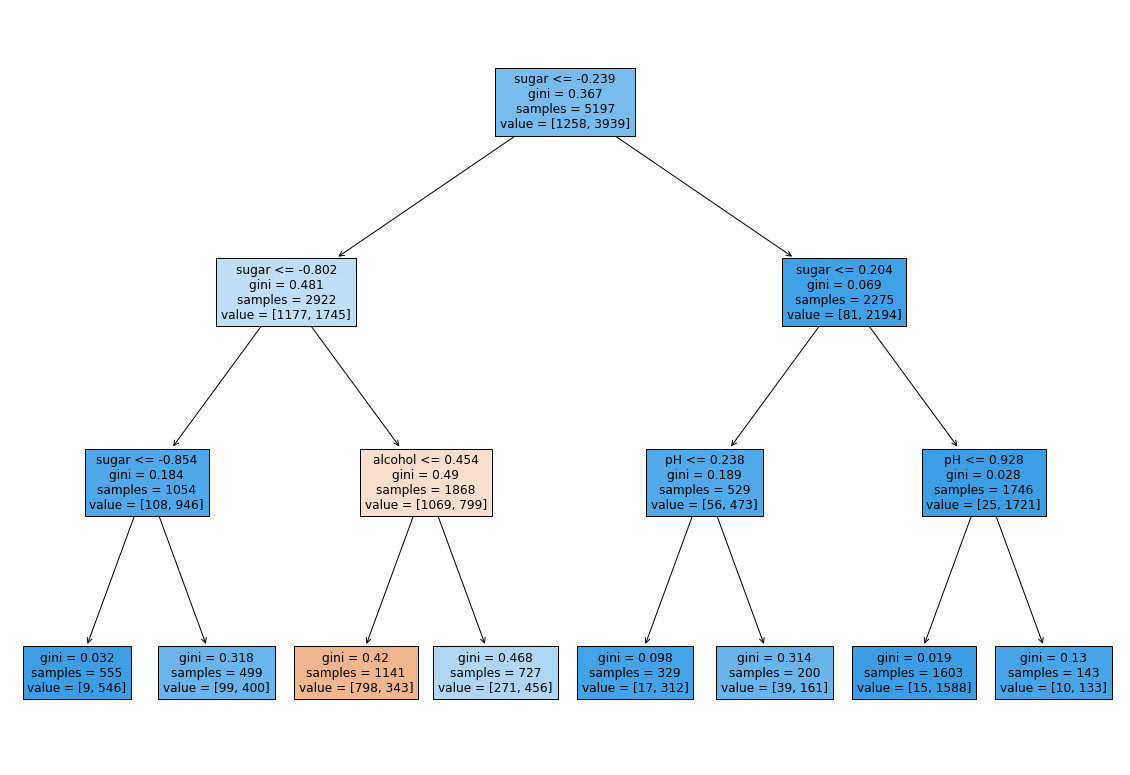

In [103]:
plt.figure(figsize = (20, 14))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [104]:
# 결정 트리 알고리즘은 데이터의 표준화 전처리를 할 필요가 없다.
dt2 = DecisionTreeClassifier(random_state = 42, max_depth = 3)
dt2.fit(train_input, train_target)
print(dt2.score(train_input, train_target))
print(dt2.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


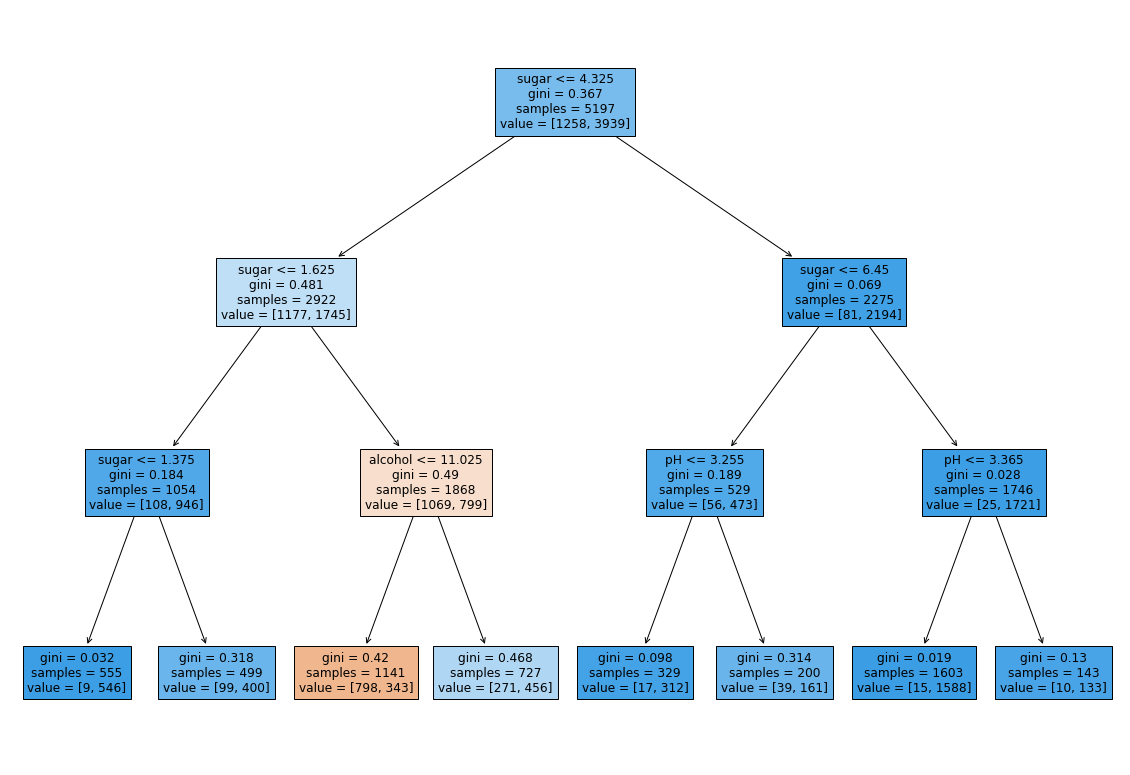

In [105]:
plt.figure(figsize = (20, 14))
plot_tree(dt2, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [106]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])